In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats 

# Energy Spectrum

In [2]:
def function_1(E):
    """
    defining function one with the required criteria
    """
    if E < 0.1:
        a = 0
    elif E >= 0.1 and E <= 0.9:
        a = 1/E
    elif E>0.9:
        a = 0
    return a
        

In [3]:
f1 = []
array = np.arange(0.01, 2.0, 0.005)
for i in range(len(array)):
    a = function_1(array[i])
    f1.append(a)

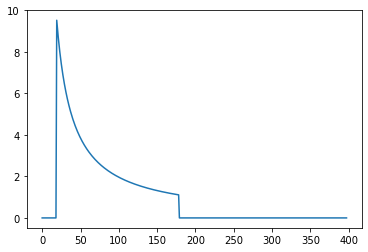

In [4]:
plt.plot(f1)

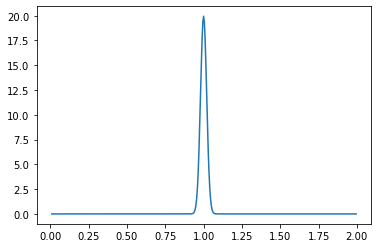

In [5]:
# f2 as a gaussian, mean = 1 and sd = 0.02
f2 = stats.norm.pdf(array, 1, 0.02)

plt.plot(array, f2)

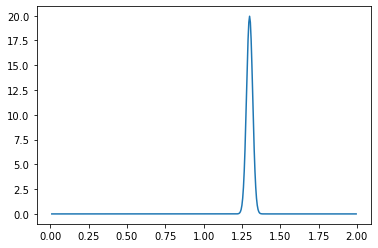

In [6]:
# f3 as a gaussian, mean = 1.3 and sd = 0.02
f3 = stats.norm.pdf(array, 1.3, 0.02)

plt.plot(array, f3)

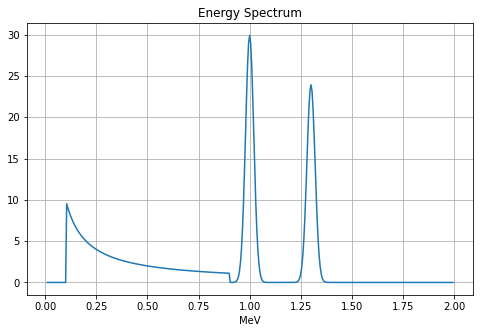

In [7]:
# definning the coefficients
a1 =1
a2 =1.5
a3 =1.2

# Defining F as the sum of the functions
F = a1*f1 + a2*f2 + a3*f3


plt.figure(figsize=(8, 5))
plt.xlabel('MeV')
plt.plot(array, F)
plt.title('Energy Spectrum')
plt.grid()
#plt.savefig('Energy Spectrum.png')
plt.show()

In [8]:
def gaussian(x, mu, sig):
    g = np.exp(-0.5 * np.power(((x-mu)/sig),2)) * (1/(sig*np.sqrt(2*np.pi)))
    return g

In [9]:
def sigma_g(E,sd):
    s = sd * np.sqrt(E)
    return s

conv1 = [] 
conv2 = []
conv3 = []
conv4 = []
for i in range(len(array)):
    # for 1.
    sigma1 = sigma_g(array[i],0.05)
    a = gaussian(array[i],array,sigma1)
    conv1.append(a)
    # for 2.
    sigma2 = sigma_g(array[i],0.1)
    b = gaussian(array[i],array,sigma2)
    conv2.append(b)
    # for 3.
    sigma3 = sigma_g(array[i],0.3)
    c = gaussian(array[i],array,sigma3)
    conv3.append(c)
    # for 4.
    sigma4 = sigma_g(array[i],0.01)
    d = gaussian(array[i],array,sigma4)
    conv4.append(d)

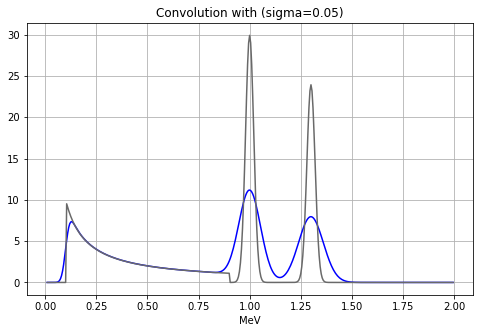

In [10]:
ge1= np.zeros(398)
ge2= np.zeros(398)
ge3= np.zeros(398)
ge4= np.zeros(398)
a=[]
b=[]
c=[]
d=[]

for i in range(len(array)):
    a = np.convolve(F[i],conv1[i])
    b = np.convolve(F[i],conv2[i])
    c = np.convolve(F[i],conv3[i])
    d = np.convolve(F[i],conv4[i])
    ge1 = ge1 + a
    ge2 = ge2 + b
    ge3 = ge3 + c
    ge4 = ge4 + d

plt.figure(figsize=(8, 5))
plt.plot(array,ge1/199, color = 'b')
plt.plot(array,F, color = 'dimgrey')
plt.xlabel('MeV')
plt.grid()
plt.title('Convolution with (sigma=0.05)')
plt.savefig('Convolution Sigma=0.5.png')
plt.show()

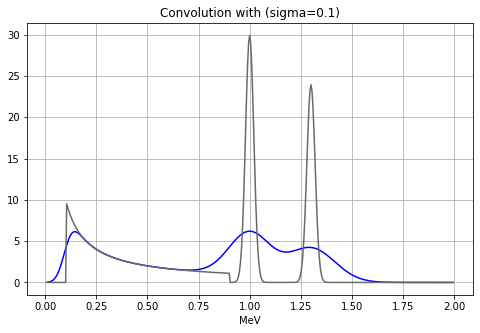

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(array,ge2/199, color = 'b')
plt.plot(array,F, color = 'dimgrey')
plt.xlabel('MeV')
plt.grid()
plt.title('Convolution with (sigma=0.1)')
plt.savefig('Convolution Sigma=0.1.png')
plt.show()

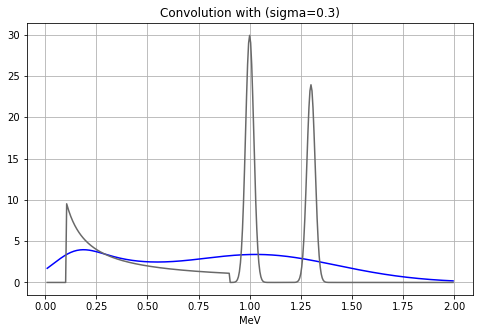

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(array,ge3/199, color = 'b')
plt.plot(array,F, color = 'dimgrey')
plt.xlabel('MeV')
plt.grid()
plt.title('Convolution with (sigma=0.3)')
plt.savefig('Convolution Sigma=0.3.png')
plt.show()

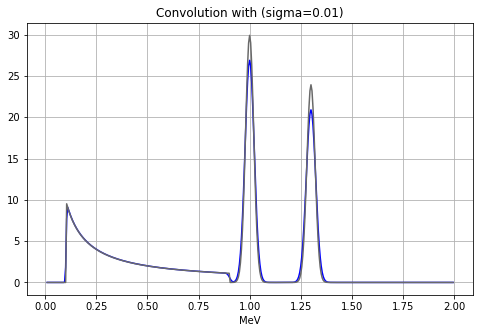

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(array,ge4/199, color = 'b')
plt.plot(array,F, color = 'dimgrey')
plt.xlabel('MeV')
plt.grid()
plt.title('Convolution with (sigma=0.01)')
plt.savefig('Convolution Sigma=0.01.png')
plt.show()